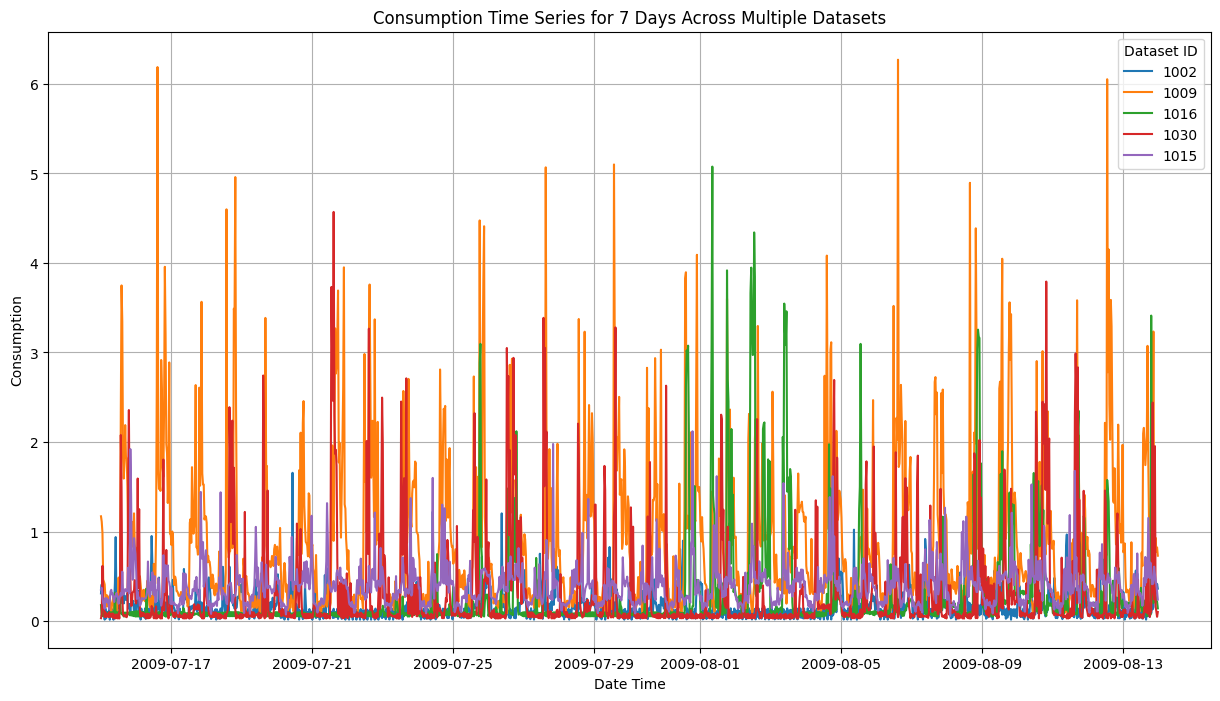

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# List of data folder paths
data_folders = [
    f"data/Energy/Electricity/residential_1002.pkl",
    f"data/Energy/Electricity/residential_1009.pkl",
    f"data/Energy/Electricity/residential_1016.pkl",
    f"data/Energy/Electricity/residential_1030.pkl",
    f"data/Energy/Electricity/residential_1015.pkl",
]

# Define the start date and the period length
start_date = '2009-07-15'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=30)

# Initialize the plot
plt.figure(figsize=(15, 8))

# Loop through each data folder, load the data, set the index, slice the period, and plot
for folder in data_folders:
    data = pd.read_pickle(folder)
    data.set_index('date_time', inplace=True)
    data_period = data.loc[start_date:end_date]
    plt.plot(data_period.index, data_period['consumption'], label=folder.split('_')[-1].split('.')[0])

# Finalize the plot
plt.title('Consumption Time Series for 7 Days Across Multiple Datasets')
plt.xlabel('Date Time')
plt.ylabel('Consumption')
plt.legend(title='Dataset ID', loc='upper right')
plt.grid(True)
plt.show()

In [2]:
import numpy as np

def create_sequences(data, input_seq_length, prediction_seq_length):
    """
    Function to preprocess sequential data to make it usable for training neural networks.
    It transforms raw data into input-target pairs.

    :param data: the dataframe containing the data or the numpy array containing the data
    :param input_seq_length: The length of the input sequences. It is the number of consecutive data points used as input.
    :param prediction_seq_length: The length of the prediction sequences. It is the number of consecutive data points used as output.
    :return: the numpy arrays of the inputs and the targets,
    where the inputs are sequences of consecutive data points and the targets are the sequences of the next data points.
    """
    if len(data) < input_seq_length + prediction_seq_length:
        raise ValueError("The length of the data is less than the total sequence length (input + prediction)")

    xs, ys = [], []
    # Iterate over data indices
    for i in range(len(data) - input_seq_length - prediction_seq_length + 1):
        if type(data) is pd.DataFrame:
            # Define inputs
            x = data.iloc[i:i + input_seq_length]

            # Define target
            y = data.iloc[i + input_seq_length:i + input_seq_length + prediction_seq_length]

        else:
            # Define inputs
            x = data[i:i + input_seq_length]

            # Define target
            y = data[i + input_seq_length:i + input_seq_length + prediction_seq_length]

        xs.append(x)
        ys.append(y)

    # Convert lists to numpy arrays
    xs = np.array(xs)
    ys = np.array(ys)

    # Shuffle the sequences
    indices = np.arange(xs.shape[0])
    np.random.shuffle(indices)
    xs = xs[indices]
    ys = ys[indices]

    return xs, ys

In [3]:
seq = create_sequences(data, 28, 7)